Populating the interactive namespace from numpy and matplotlib


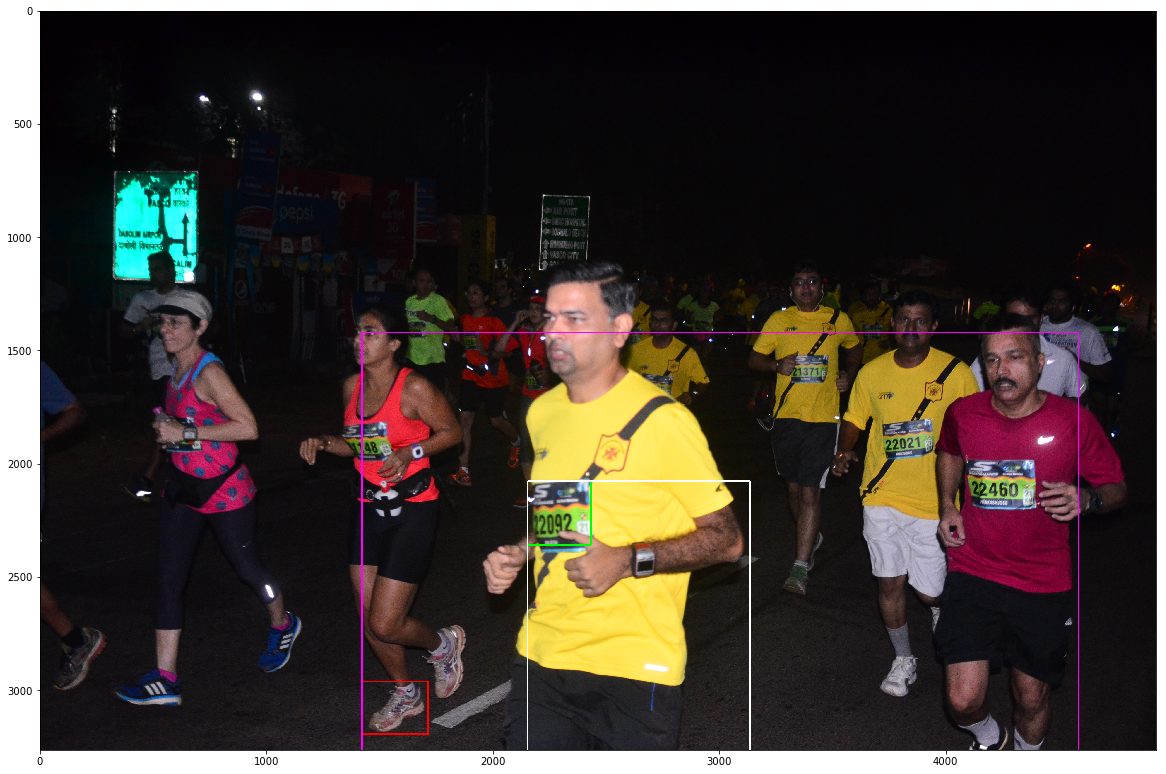

In [32]:
import json
from scipy import misc 
import matplotlib.pyplot as plt
import cv2
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

def read_json(json_filename):
    """Reads the JSON file as a dictionary.
    Args:
        json_filename (string): The JSON file to read.
    Returns:
        dict: The JSON data, parsed as a dictionary.
    """
    with open(json_filename, 'r') as json_fp:
        json_data = json.load(json_fp)
    return json_data

def annotate_image(img, detections, color, thick):
    black = (0,0,0)
    font = cv2.FONT_HERSHEY_PLAIN
    # Bib regions (draw first)
    for region in detections:
        x1 = region["x1"]
        y1 = region["y1"]
        x2 = region["x2"]
        y2 = region["y2"]
        cv2.rectangle(img, (x1, y1), (x2, y2), color, thick)
    return img

estimated_truths = read_json("/Users/Alex/Desktop/estimated_truths.json")
ground_truths = read_json("/Users/Alex/Desktop/ground_truths.json")
intersection_boxes = read_json("/Users/Alex/Desktop/intersection_boxes.json")
min_bounding_boxes = read_json("/Users/Alex/Desktop/min_bounding_boxes.json")

img = misc.imread("/Users/Alex/Desktop/yolo_crop/run3/2dc85b4090468f66b12eaaf8c1a76c8a.jpg")
img = annotate_image(img, estimated_truths, (255, 0, 0), 5) # ESTIMATES IN RED
img = annotate_image(img, ground_truths, (0, 255, 0), 5)    # GROUND TRUTHS IN GREEN
img = annotate_image(img, intersection_boxes, (255, 255, 255), 5) # INTERSECTION BOXES IN BLUE
img = annotate_image(img, min_bounding_boxes, (255, 0, 255), 5) # MIN BOUNDING BOXES IN MAGENTA
plt.imshow(img)
plt.savefig("/Users/Alex/Desktop/min_bounding_boxes.png")
